<a href="https://colab.research.google.com/github/vasanthirajkumar/vasanthirajkumar/blob/master/Wind_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

# Upload the kaggle file downloaded from Kaggle
files.upload()


Saving archive.zip to archive.zip


{'archive.zip': b'PK\x03\x04-\x00\x00\x08\x08\x00\xf4|CW\xb4\x88\xc8\xa0\xff\xff\xff\xff\xff\xff\xff\xff\x10\x00\x14\x00Weather Data.csv\x01\x00\x10\x00\x1f\x0f\x07\x00\x00\x00\x00\x00h\x91\x01\x00\x00\x00\x00\x00\x8c\xbdK\x0f%;r\x1e\xb8\x1f`\xfeC\xa3\x81\xd9\x9d:\x9d|\x93\xb3\xb4\x05\x8ff1\x80`\x19\xe3\xa5\xd03\xba\xb0\x1an\xa9\x8d\xee6\x04\xe9\xd7;\xe3\xc9\x88$\x99u\x17\xb7Pu\x11\xdf!\x93\x8f`0\xe2\x8b\xe0\xdf\xfc\xfe\xaf\xbf\xfc\xee\xbf\xfc\xe1\x9f\x7f\xf9\xfc\x97_\xfe\xf9\x7f\xfc\xc3\x7f\xfc\xfc\xcd/\xff\xfa\x9b\xbf\xfb\xd3\x1f\xfe\xe5\xaf\xbf\xe1\xff\xf1\x9f\x7f\xf9\xe3o\xfe\xf6\x7f\xfe\xf3?\xfc\x1f\x9f\xff\xfa\x87\x7f\xf9\xc7\xdf\xfc\xfd\xff\xf8\xe5\x97\x7f\xfc\x87\xff\xfe\xcf\xbf\xfb\xa7\xcf\xff\xfb\x87\xbf\xfc\xe1\xff\xfb\xc3\x1f\xff\xf0\xd7\x7f\xbb\xff\xfd\xf9\xbb?\xff\xf2\x97\xbf\xfc\xc3\x7f\xff\xbb\xdf\x7f\xfe\xeb/\xbf\xff\xeb?\xfd\xf2\xe7\xff\xfd\x7f\x0b\xbf\x0b\xbf\x8bW\x88\xbf\xb9\xfe\xcf\xeb\xfa\xfc\x08\xdf\xfe\xf9\x91\xbe\xe3\xd3\xeb\'\x7f\xfa\'\\\xe1\x1b\xf3\xe7?\xfd\x



!kaggle datasets download -d <dataset_name> -p /content

//this line is used to download using kaggle api if we want to pull anything directly from kaggle



In [ ]:
import zipfile

"""content/drive/MyDrive/archive.zip my archieve.zip file is in content-drive-mydrive folder."""

#with zipfile.ZipFile("/content/drive/MyDrive/archive.zip", "r") as zip_ref:
#    zip_ref.extractall("/sample_data/dataset")

with zipfile.ZipFile("/content/archive.zip", "r") as zip_ref:
    zip_ref.extractall("/content/sample_data/dataset/.")

!file "/content/sample_data/dataset/Weather Data.csv"

/content/sample_data/dataset/Weather Data.csv: CSV text


In [ ]:
!file /content/sample_data/dataset/WeatherData.csv

/content/sample_data/dataset/WeatherData.csv: CSV text


In [ ]:
import pandas as pd

# Read the .csv file into a Pandas DataFrame
df = pd.read_csv("/content/sample_data/dataset/WeatherData.csv")

# Display the DataFrame to verify the data
print(df.head())


       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog  


In [ ]:
if not "df" in globals():
    raise ValueError("DataFrame 'df' not found in the global namespace")

In [ ]:
import re
for col_name in df.columns:
    if not re.match("^[a-zA-Z0-9_]+$", col_name):
        print(f"Illegal character(s) found in column name: {col_name}")

Illegal character(s) found in column name: Date/Time
Illegal character(s) found in column name: Dew Point Temp_C
Illegal character(s) found in column name: Rel Hum_%
Illegal character(s) found in column name: Wind Speed_km/h


In [ ]:
def sanitize_column_name(col_name):
    return re.sub("[^a-zA-Z0-9_]", "_", col_name)

df.columns = [sanitize_column_name(col) for col in df.columns]

In [ ]:
import re
for col_name in df.columns:
    if not re.match("^[a-zA-Z0-9_]+$", col_name):
        print(f"Illegal character(s) found in column name: {col_name}")

In [ ]:
!pwd


/content


In [ ]:
!chmod 600 /content/drive/MyDrive

In [ ]:
!chmod 777 /sample_data/dataset

In [ ]:
!ls -l /sample_data/dataset

total 908
-rw-r--r-- 1 root root     48 Mar 30 12:37  output.nc
-rw-r--r-- 1 root root 462623 Mar 30 13:07 'Weather Data.csv'
-rw-r--r-- 1 root root 462623 Mar 30 11:48  WeatherData.csv


In [ ]:
!ls -ld /sample_data/dataset/

drwxrwxrwx 3 root root 4096 Mar 30 12:28 /sample_data/dataset/


In [ ]:
!chmod a+w /sample_data/dataset/

In [ ]:
!ls -ld /sample_data/dataset/

drwxrwxrwx 3 root root 4096 Mar 30 12:28 /sample_data/dataset/


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/sample_data/dataset/WeatherData.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Explore dimensions and variables
print("\nDimensions of the dataset:")
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

print("\nVariables in the dataset:")
print(df.columns)

# Extract relevant features
#relevant_features = ["timestamp", "wind_speed", "temperature", "humidity"]
relevant_features = ["Date/Time", "Wind Speed_km/h", "Temp_C", "Rel Hum_%"]


# Convert timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['Date/Time'])

# Extract temporal features
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['season'] = (df['timestamp'].dt.month % 12 + 3) // 3  # Calculate season based on month

# Display the updated DataFrame with extracted features
print("\nUpdated DataFrame with extracted features:")
print(df.head())


First few rows of the dataset:
       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog  

Dimensions of the dataset:
Number of rows: 8784
Number of columns: 8

Variables in the dataset:
Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kP

In ARIMA (AutoRegressive Integrated Moving Average) modeling, the order of the model is defined by three parameters: p, d, and q.

p (AR order): This parameter represents the number of lagged observations included in the model to predict the current value. In simpler terms, it indicates how many past time points are considered to predict the future value. A higher value of p means the model considers more past observations.

d (Differencing order): Differencing is a technique used to make a time series data stationary by removing trends or seasonality. The d parameter in ARIMA specifies the number of differences needed to make the data stationary. In other words, it indicates how many times the data needs to be differenced to remove trends or seasonality.

q (MA order): This parameter represents the number of lagged forecast errors included in the model to predict the current value. It indicates how many past errors are considered to predict the future value. A higher value of q means the model considers more past forecast errors.

In simple terms, p, d, and q are like knobs that you adjust to fine-tune the ARIMA model's performance. p controls how many past observations are used for prediction, d controls how much differencing is applied to make the data stationary, and q controls how many past errors are considered in the prediction process. Adjusting these parameters helps improve the accuracy of the ARIMA model in forecasting future values based on past data.

test_data.index represents the dates or time points from the test dataset.
test_data[target_variable] represents the actual values of the target variable (wind power) from the test dataset.
forecast_values represents the predicted values obtained from the ARIMA model.
This code will generate a plot where the actual values are represented by a blue line, and the predicted values are represented by a red line. This visualization allows you to compare how well the ARIMA model predicts the wind power values against the actual observed values over time.

Organized DataFrame:
            timestamp  wind_speed  temperature  humidity  day_of_week  month  \
0 2012-01-01 00:00:00           4         -1.8        86            6      1   
1 2012-01-01 01:00:00           4         -1.8        87            6      1   
2 2012-01-01 02:00:00           7         -1.8        89            6      1   
3 2012-01-01 03:00:00           6         -1.5        88            6      1   
4 2012-01-01 04:00:00           7         -1.5        88            6      1   

   season  
0       1  
1       1  
2       1  
3       1  
4       1  


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


Mean Absolute Error (MAE): 8.568727923899786
Mean Squared Error (MSE): 104.63982535236602
Root Mean Squared Error (RMSE): 10.229360945453339


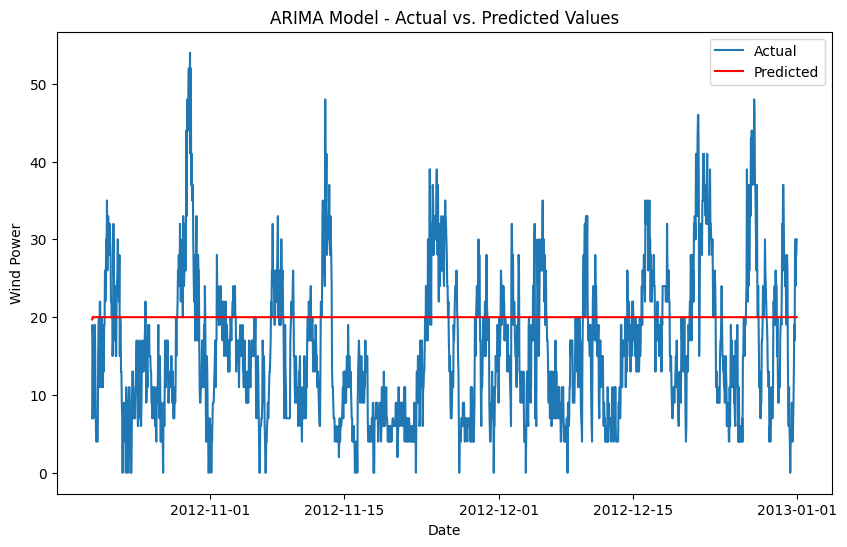

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


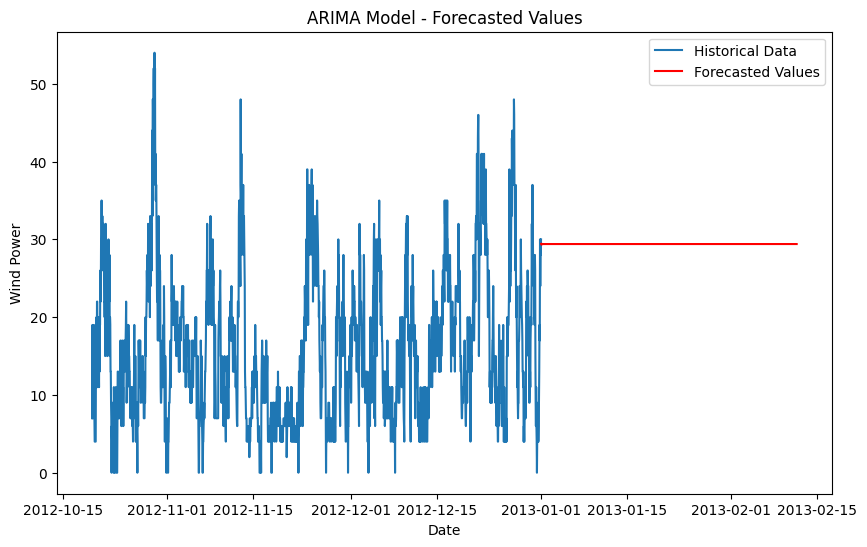

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# Load the dataset
df = pd.read_csv("/content/sample_data/dataset/WeatherData.csv")

# Extract relevant features
#relevant_features = ["Date/Time", "wind_speed", "temperature", "humidity"]

relevant_features = ["timestamp", "wind_speed", "temperature", "humidity"]
#relevant_features = ["Date/Time", "Wind Speed_km/h", "Temp_C", "Rel Hum_%"]

# Convert timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['Date/Time'])

df['wind_speed'] = df['Wind Speed_km/h']

df['temperature'] = df['Temp_C']

df['humidity'] = df['Rel Hum_%']

# Extract temporal features
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['season'] = (df['timestamp'].dt.month % 12 + 3) // 3  # Calculate season based on month

# Select relevant features and organize into a new DataFrame
organized_df = df[relevant_features + ['day_of_week', 'month', 'season']]

# Display the organized DataFrame
print("Organized DataFrame:")
print(organized_df.head())


# Preprocess the data if needed (e.g., handle missing values, ensure the timestamp is in datetime format)

# Define the target variable (wind power) and the predictor variable (timestamp)
target_variable = "wind_speed"
predictor_variable = "timestamp"

# Create a time series DataFrame with the timestamp as the index
ts_df = df.set_index(pd.to_datetime(df[predictor_variable]))

# Resample the data if necessary (e.g., if the data is not evenly spaced in time)

# Split the data into training and testing sets
train_size = int(len(ts_df) * 0.8)
train_data, test_data = ts_df.iloc[:train_size], ts_df.iloc[train_size:]

# Define the order of the ARIMA model
p = 2  # Replace with your desired value #A higher value of p means the model considers more past observations.
d = 1  # Replace with your desired value #it indicates how many times the data needs to be differenced to remove trends or seasonality.
q = 0  # Replace with your desired value #A higher value of q means the model considers more past forecast errors.

#p controls how many past observations are used for prediction,
#d controls how much differencing is applied to make the data stationary,
#q controls how many past errors are considered in the prediction

# Fit ARIMA model
order = (p, d, q)  # Define the order of ARIMA model (p: AR order, d: differencing order, q: MA order)
model = ARIMA(train_data[target_variable], order=order)
fitted_model = model.fit()

# Forecast future values
forecast_values = fitted_model.forecast(steps=len(test_data))

# Evaluate the model (e.g., calculate metrics like MSE, RMSE)
# You can use appropriate evaluation metrics based on the specific requirements of your problem

# Calculate MSE
mse = mean_squared_error(test_data[target_variable], forecast_values)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAE
mae = mean_absolute_error(test_data[target_variable], forecast_values)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


# Visualize the results (optional)
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data[target_variable], label='Actual')
plt.plot(test_data.index, forecast_values, color='red', label='Predicted')
plt.title('ARIMA Model - Actual vs. Predicted Values')
plt.xlabel('Date')
plt.ylabel('Wind Power')
plt.legend()
plt.show()


# Make predictions for future time periods if needed
# Fit ARIMA model to the entire dataset
arima_model = ARIMA(test_data[target_variable], order=(p, d, q))
arima_fitted_model = arima_model.fit()

# Forecast future values
forecast_horizon = 1000  # Define the number of future time periods to forecast
forecast_values = arima_fitted_model.forecast(steps=forecast_horizon)

# Visualize the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data[target_variable], label='Historical Data')
plt.plot(forecast_values.index, forecast_values, color='red', label='Forecasted Values')
plt.title('ARIMA Model - Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Wind Power')
plt.legend()
plt.show()


SARIMAX is used to initialize the SARIMA model with the specified order and seasonal order parameters.
sarima_model.fit() is used to fit the SARIMA model to the training data.
sarima_fitted_model.predict() is used to forecast future values based on the fitted SARIMA model.
Finally, the forecasted values are visualized alongside the historical data to evaluate the performance of the SARIMA model in predicting wind power.

In this code:

test_data.index represents the dates or time points from the test dataset.
test_data[target_variable] represents the actual values of the target variable (wind power) from the test dataset.
forecast_values represents the predicted values obtained from the ARIMA model.
This code will generate a plot where the actual values are represented by a blue line, and the predicted values are represented by a red line. This visualization allows you to compare how well the ARIMA model predicts the wind power values against the actual observed values over time.

In the SARIMA model, the parameters p, d, and q represent the non-seasonal components, while the parameters P, D, Q, and m represent the seasonal components. Here's how you can interpret these parameters:

p: Autoregressive (AR) order - The number of lag observations included in the model.
d: Differencing order - The number of times the data needs to be differenced to make it stationary.
q: Moving Average (MA) order - The number of lag forecast errors included in the model.
m: Seasonal period - The number of time steps for each seasonal period.
These parameters are usually determined through statistical techniques such as autocorrelation and partial autocorrelation plots, as well as grid search methods for finding the best-fitting model.

However, in the provided code snippet, these parameters (p, d, q, m) are placeholders. You would need to replace them with appropriate values based on the characteristics of your data and domain knowledge. Typically, you would start with some initial values and then fine-tune them based on the model performance.

For example, you might start with:

p = 1 (based on autocorrelation plot)
d = 1 (if the data requires differencing to make it stationary)
q = 1 (based on partial autocorrelation plot)
m = 12 (if your data has monthly seasonality)

Organized DataFrame:
            timestamp  wind_speed  temperature  humidity  day_of_week  month  \
0 2012-01-01 00:00:00           4         -1.8        86            6      1   
1 2012-01-01 01:00:00           4         -1.8        87            6      1   
2 2012-01-01 02:00:00           7         -1.8        89            6      1   
3 2012-01-01 03:00:00           6         -1.5        88            6      1   
4 2012-01-01 04:00:00           7         -1.5        88            6      1   

   season  
0       1  
1       1  
2       1  
3       1  
4       1  


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


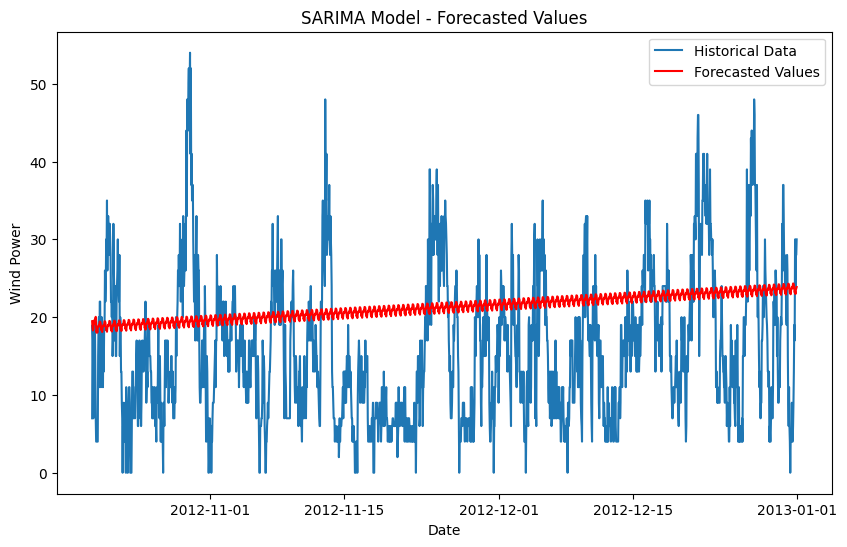

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# Load the dataset
df = pd.read_csv("/sample_data/dataset/WeatherData.csv")

# Extract relevant features
#relevant_features = ["Date/Time", "wind_speed", "temperature", "humidity"]

relevant_features = ["timestamp", "wind_speed", "temperature", "humidity"]
#relevant_features = ["Date/Time", "Wind Speed_km/h", "Temp_C", "Rel Hum_%"]

# Convert timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['Date/Time'])

df['wind_speed'] = df['Wind Speed_km/h']

df['temperature'] = df['Temp_C']

df['humidity'] = df['Rel Hum_%']

# Extract temporal features
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['season'] = (df['timestamp'].dt.month % 12 + 3) // 3  # Calculate season based on month

# Select relevant features and organize into a new DataFrame
organized_df = df[relevant_features + ['day_of_week', 'month', 'season']]

# Display the organized DataFrame
print("Organized DataFrame:")
print(organized_df.head())


# Preprocess the data if needed (e.g., handle missing values, ensure the timestamp is in datetime format)

# Define the target variable (wind power) and the predictor variable (timestamp)
target_variable = "wind_speed"
predictor_variable = "timestamp"

# Create a time series DataFrame with the timestamp as the index
ts_df = df.set_index(pd.to_datetime(df[predictor_variable]))

# Resample the data if necessary (e.g., if the data is not evenly spaced in time)

# Split the data into training and testing sets
train_size = int(len(ts_df) * 0.8)
train_data, test_data = ts_df.iloc[:train_size], ts_df.iloc[train_size:]

#p d q values
P=p=1
D=d=1
Q=q=1
m=12 #data has monthly seasonality

# Fit SARIMA model
sarima_model = SARIMAX(train_data[target_variable], order=(p, d, q), seasonal_order=(P, D, Q, m))
sarima_fitted_model = sarima_model.fit()

# Forecast future values
sarima_forecast_values = sarima_fitted_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data[target_variable], label='Historical Data')
plt.plot(test_data.index, sarima_forecast_values, color='red', label='Forecasted Values')
plt.title('SARIMA Model - Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Wind Power')
plt.legend()
plt.show()




We define an LSTMModel class that inherits from nn.Module to define the LSTM architecture.
We prepare the data by creating sequences and targets.
We instantiate the model, define the loss function (mean squared error), and the optimizer (Adam).
We train the model for a certain number of epochs.
We evaluate the model on the test set.
We make predictions for future time periods using the trained model.
We visualize the results.

In [ ]:
import pandas as pd

df = pd.read_csv("/content/sample_data/dataset/WeatherData.csv")
missing_values = df.isnull().sum()
print(missing_values)
missing_data = df[df.isnull().any(axis=1)]
print(missing_data)
print(data.shape)
print(data.columns)
df.dropna(inplace=True)
#df['missing_column'].fillna(df['missing_column'].mean(), inplace=True)
print("values after drop")
missing_values = df.isnull().sum()
print(missing_values)
missing_data = df[df.isnull().any(axis=1)]
print(missing_data)
print(data.shape)
print(data.columns)


Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64
Empty DataFrame
Columns: [Date/Time, Temp_C, Dew Point Temp_C, Rel Hum_%, Wind Speed_km/h, Visibility_km, Press_kPa, Weather]
Index: []
(8784, 8)
Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')
values after drop
Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64
Empty DataFrame
Columns: [Date/Time, Temp_C, Dew Point Temp_C, Rel Hum_%, Wind Speed_km/h, Visibility_km, Press_kPa, Weather]
Index: []
(8784, 8)
Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')


def __init__(self, input_size, hidden_size, num_layers, output_size):: This line defines the constructor (__init__ method) of the LSTMModel class. It takes four parameters: input_size, hidden_size, num_layers, and output_size.

super(LSTMModel, self).__init__(): This line calls the constructor of the superclass (nn.Module). It ensures that the LSTMModel inherits the properties and methods of the nn.Module class.

self.hidden_size = hidden_size: This line initializes an instance variable hidden_size with the value passed as an argument. The hidden_size represents the number of features in the hidden state of the LSTM.

self.num_layers = num_layers: This line initializes another instance variable num_layers with the value passed as an argument. The num_layers represents the number of LSTM layers in the model.

self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True): This line creates an LSTM layer using the nn.LSTM class from PyTorch's torch.nn module. It takes the following arguments:

input_size: The number of expected features in the input (e.g., the number of input variables).
hidden_size: The number of features in the hidden state of each LSTM cell.
num_layers: The number of LSTM layers stacked on top of each other.
batch_first=True: This argument specifies whether the input and output tensors are provided with batch size as the first dimension. Setting it to True means the input and output tensors will have the shape (batch_size, sequence_length, input_size).
self.fc = nn.Linear(hidden_size, output_size): This line defines a fully connected (dense) layer using the nn.Linear class from PyTorch's torch.nn module. It initializes a linear transformation with hidden_size input features and output_size output features. This layer is typically used to map the hidden state of the last LSTM layer to the desired output size.

Overall, this code snippet defines the architecture of an LSTM model using PyTorch's neural network module (nn). It sets up the LSTM layer with specified input size, hidden size, and number of layers, and initializes a fully connected layer to produce the final output.

def forward(self, x):: This line defines the forward method of the LSTMModel class. The forward method is where the actual computation of the model takes place. It takes one argument x, which represents the input data.

h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device): This line initializes the initial hidden state (h0) of the LSTM layer. It creates a tensor of zeros with dimensions (num_layers, batch_size, hidden_size), where:

self.num_layers: The number of LSTM layers in the model.
x.size(0): The batch size of the input data x.
self.hidden_size: The number of features in the hidden state of each LSTM cell.
The .to(x.device) part ensures that the tensor is moved to the same device as the input tensor x.
c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device): This line initializes the initial cell state (c0) of the LSTM layer. It creates a tensor of zeros with the same dimensions as h0.

out, _ = self.lstm(x, (h0, c0)): This line applies the LSTM layer (self.lstm) to the input data x along with the initial hidden state (h0) and cell state (c0). The output out is a tensor containing the output features from the LSTM for each time step. The _ represents the hidden states of the LSTM at each time step, which are not needed in this case.

out = self.fc(out[:, -1, :]): This line applies the fully connected (dense) layer (self.fc) to the last time step of the output tensor out from the LSTM layer. It selects the last time step using out[:, -1, :]. This step is common in sequence prediction tasks where the output is desired only at the last time step.

return out: This line returns the final output tensor out, which represents the predictions of the model for each sample in the batch.

Overall, this forward method defines the forward pass of the LSTM model, where the input data is passed through the LSTM layer, and the output is passed through a fully connected layer to generate predictions.


def prepare_data(data, seq_length):: This line defines a function named prepare_data that takes two arguments:

data: This represents the input data, which is expected to be a sequence.
seq_length: This represents the length of the sequences to be created from the input data.
sequences = []: This line initializes an empty list named sequences. This list will store the input sequences.

targets = []: This line initializes another empty list named targets. This list will store the corresponding target values for each input sequence.

for i in range(len(data) - seq_length):: This line starts a loop that iterates over indices i ranging from 0 to len(data) - seq_length - 1. This loop is used to create sequences of length seq_length from the input data.

sequences.append(data[i:i+seq_length]): This line extracts a subsequence of length seq_length from the input data starting from index i and appends it to the sequences list.

targets.append(data[i+seq_length]): This line extracts the target value corresponding to the subsequence appended to the sequences list and appends it to the targets list. The target value is the next element in the input data after the subsequence.

return torch.tensor(sequences).float(), torch.tensor(targets).float(): This line converts the lists of sequences and targets into PyTorch tensors using torch.tensor(). It also converts the data type of the tensors to float using .float(). Finally, it returns the sequences tensor and the targets tensor.

In summary, this function prepares the input data for training a sequence prediction model by creating input-output pairs of subsequences from the original data. Each input sequence is of length seq_length, and the corresponding target value is the element immediately following the sequence in the original data.



Sure, let's break down this code step by step:

# Define hyperparameters: This is a comment indicating that the following lines of code will define various hyperparameters used in the model.

input_size = 1: This line defines the number of features in the input data. In this case, it's set to 1, suggesting that each data point has only one feature.

hidden_size = 64: This line defines the number of LSTM units in each LSTM layer. The hidden_size parameter determines the dimensionality of the hidden state and cell state of the LSTM.

num_layers = 2: This line defines the number of LSTM layers in the model. Having multiple layers allows the model to learn more complex patterns in the data.

output_size = 1: This line defines the number of output units in the model. Since this is a regression task (predicting a continuous value), the output size is set to 1.

seq_length = 12: This line defines the length of the input sequence. It specifies how many time steps the model will look back to make predictions.

learning_rate = 0.001: This line defines the learning rate for the optimizer. The learning rate determines the step size at each iteration while updating the model parameters during training.

num_epochs = 100: This line defines the number of training epochs. An epoch refers to one complete pass through the entire training dataset during the training process.

model = LSTMModel(input_size, hidden_size, num_layers, output_size): This line instantiates the LSTM model (LSTMModel) with the specified hyperparameters. The LSTMModel class should have been defined earlier in the code.

criterion = nn.MSELoss(): This line defines the loss function. In this case, Mean Squared Error (MSE) loss is used, which is commonly used for regression problems.

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate): This line defines the optimizer used for updating the model parameters during training. The Adam optimizer is used here, which is an adaptive learning rate optimization algorithm. It takes the model parameters (model.parameters()) and the learning rate (lr) as arguments.

Overall, this code segment sets up the hyperparameters, instantiates the LSTM model, defines the loss function, and sets up the optimizer for training the model.





for epoch in range(num_epochs):: This loop iterates over the specified number of epochs (num_epochs). An epoch is one complete pass through the entire training dataset.

optimizer.zero_grad(): Before the backward pass (gradient computation), we need to clear the gradients of all optimized variables. This is because gradients are accumulated by default in PyTorch.

outputs = model(X_train): This line computes the outputs of the model for the input data (X_train). Here, X_train represents the input features for the training set.

loss = criterion(outputs, y_train): This line calculates the loss between the predicted outputs (outputs) and the actual target values (y_train). The criterion is typically a loss function such as Mean Squared Error (MSE) or Mean Absolute Error (MAE).

loss.backward(): This line computes the gradient of the loss with respect to the model parameters. It essentially computes the gradients of the loss function with respect to each parameter of the model using backpropagation.

optimizer.step(): This line updates the model parameters based on the computed gradients and the chosen optimization algorithm (e.g., Adam, SGD). It performs a single optimization step.

if (epoch+1) % 10 == 0:: This condition checks if the current epoch is a multiple of 10. If so, it executes the following code block.

print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}'): This line prints the current epoch number and the corresponding loss value. The loss.item() method retrieves the loss value as a Python scalar, and :.4f formats the loss value to four decimal places for better readability.

Overall, this code snippet represents the training loop of a machine learning model. It iterates over the training data for a specified number of epochs, updates the model parameters based on the computed gradients, and prints the loss value periodically to monitor the training progress.




with torch.no_grad():: This line initiates a context manager to temporarily disable gradient computation. This means that operations inside this context won't be tracked for gradient computation, which is useful during inference when we don't need to compute gradients.

model.eval(): This line sets the model to evaluation mode. During evaluation mode, certain layers like dropout and batch normalization behave differently compared to training mode. This ensures that the model produces deterministic outputs during inference.

test_outputs = model(X_test): This line passes the test data (X_test) through the model to obtain the model's predictions (test_outputs) for the test set.

test_loss = criterion(test_outputs, y_test): This line calculates the loss between the predicted outputs (test_outputs) and the actual target values (y_test). Here, the same loss function (criterion, which is Mean Squared Error in this case) used during training is applied to evaluate the model's performance on the test set.

print(f'Test Loss: {test_loss.item():.4f}'): This line prints the test loss, which quantifies how well the model performs on unseen data. By monitoring the test loss, we can assess the generalization ability of the model. The item() method retrieves the scalar value of the test loss, and :.4f specifies the format to display the loss up to four decimal places.

Overall, this code snippet evaluates the trained model on the test data and computes the test loss to assess the model's performance on unseen data.




future_predictions = []: This line initializes an empty list named future_predictions. This list will store the predicted values for future time periods.

current_sequence = X_test[-1].reshape(1, seq_length, input_size): This line selects the last sequence from the test data (X_test) to start making predictions for future time periods. It reshapes the selected sequence to match the input dimensions expected by the model.

for i in range(len(test_data)):: This line initiates a loop that iterates over each time step in the test data. The length of the loop is determined by the size of the test data (len(test_data)).

with torch.no_grad():: This line initiates a context manager to temporarily disable gradient computation. This is done to speed up the inference process and save memory since gradients are not needed for prediction.

model.eval(): This line sets the model to evaluation mode, ensuring that certain layers like dropout and batch normalization behave correctly during inference.

future_prediction = model(current_sequence): This line passes the current sequence (current_sequence) through the model to predict the value for the next time step. The predicted value (future_prediction) is obtained.

future_predictions.append(future_prediction.item()): This line appends the predicted value (future_prediction.item()) to the list of future_predictions.

current_sequence = torch.cat((current_sequence[:, 1:, :], future_prediction.reshape(1, 1, input_size)), axis=1): This line updates the current_sequence by removing the first element of the sequence, shifting the sequence one step forward in time, and appending the predicted value (future_prediction) to the end of the sequence. This updated sequence is then used for the next prediction iteration.

Overall, this code snippet iteratively predicts future values using the trained model based on the last observed sequence from the test data. Each predicted value is appended to the future_predictions list, and the process continues for the desired number of future time periods.




plt.plot(np.arange(len(data)), data, label='Original Data'): This line creates a line plot for the original data. np.arange(len(data)) generates an array of indices representing the time steps of the original data. data represents the original data itself. The label='Original Data' argument assigns a label to this plot for the legend.

plt.plot(np.arange(len(data)-len(test_data), len(data)), future_predictions, label='Future Predictions'): This line creates a line plot for the predicted values of future time periods. np.arange(len(data)-len(test_data), len(data)) generates an array of indices representing the time steps corresponding to the predicted values. future_predictions contains the predicted values. The label='Future Predictions' argument assigns a label to this plot for the legend.

plt.xlabel('Time'): This line sets the label for the x-axis of the plot as 'Time'.

plt.ylabel('Value'): This line sets the label for the y-axis of the plot as 'Value'.

plt.title('LSTM Forecasting'): This line sets the title of the plot as 'LSTM Forecasting'.

plt.legend(): This line adds a legend to the plot based on the labels assigned to each plotted line.

plt.show(): This line displays the plot.

Overall, this code snippet visualizes both the original data and the predicted values for future time periods on the same plot, allowing for a visual comparison between the two.








